In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def clean_location(x):
    """Standardize location names"""
    x = str(x).lower().strip()
    x = x.replace("  ", " ").replace(".", "").replace(",", "")
    # we want to pick reviews that have either of these in the "state" column
    ca_keywords = [" ca", "ca ", "california", "calif", "san francisco", "nuevo león", "san jose", "san diego", "fresno",
                   "southern calif", "sacramento", "los angeles", "bay area", "san diego", "orange county", "paso robles", "glendale"]
    
    ma_keywords = ["ma ", " ma", "boston", 
                   "massachussett", "massachusetts", "lowell",
                   "worcester", "cambridge", "plymouth",
                   "springfield", "new bedford", "quincy", "lynn"]
    
    or_keywords = ["oregon", "eugene", " or", "or ", "portland", "bend", "medford"]
    ny_keywords = ["ny ", " ny", "new york", "newyork", "buffalo", "rochester", "yonkers", 
                   "syracuse", "albany", "new york city", "nyc", "manhattan", "brooklyn", "queens", "bronx", "staten island", "long island", "longisland"]
    tx_keywords = ["texas", " tx", "tx ", "houston", "austin", "dallas", "san antonio", "sanantonio", "fort worth", "fortworth", "el paso", "elpaso", "arlington", "corpus christi", "corpuschristi", "plano"]
    if any(keyword in x for keyword in ca_keywords) or (x == "ca"):
        return "ca"
    elif any(keyword in x for keyword in ma_keywords) or (x == "ma"):
        return "ma"
    elif any(keyword in x for keyword in or_keywords) or (x == "or"):
        return "or"
    elif any(keyword in x for keyword in ny_keywords) or (x == "ny"):
        return "ny"
    elif any(keyword in x for keyword in tx_keywords) or (x == "tx"):
        return "tx"
    return x

def clean_company(x):
    """Merge Uber, Uber Eats, and Uber Driver into one company name"""
    if "uber" in x:
        return "uber"
    return x

def is_driver(x):
    """Check if the reviewer is a driver etc."""
    if type(x) == str:
        x = x.lower()
        keywords = ["driver", "dasher", "delivery", "courier", "operator", "partner", "freelance", "self employed", "self-employe", "selfemploye",
                    "chauffer", "taxi", "porter", "rideshar", "contractor", "shopper", "food runner", "ambassador", "food handler"]
        if any(keyword in x for keyword in keywords):
            return True
    return False

In [68]:
paths = ["indeed_uber_reviews.csv", "indeed_Uber-Drivers_reviews.csv", 
         "indeed_Ubereats_reviews.csv", "indeed_Lyft_reviews.csv", "indeed_Instacart_reviews.csv",
         "indeed_Grubhub_reviews.csv", "indeed_Doordash_reviews.csv", "indeed_Postmates_reviews.csv"]
dataframes = []
for path in paths:
    _df = pd.read_csv(path)
    _df["company"] = path.split("_")[1].lower()
    dataframes.append(_df)
    
df = pd.concat(dataframes).drop_duplicates().set_index("id").drop(["url", "language"], axis=1)

df["datetime"] = pd.to_datetime(df["datetime"])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df["state"] = df["state"].apply(clean_location)
df["company"] = df["company"].apply(clean_company)
df["is_driver"] = df["reviewer"].apply(is_driver)
df = df[ (df["year"] > 2017) & (df["year"] < 2023)]


In [73]:
#df[df["state"] == "ny"].shape

In [71]:
df[df["state"] == "ca"].to_csv("indeed_reviews_ca.csv", index=True) # filter out reviews that don't have any of the above in the "state" column
df[df["state"] == "ma"].to_csv("indeed_reviews_ma.csv", index=True) # filter out reviews that don't have any of the above in the "state" column
df[df["state"] == "or"].to_csv("indeed_reviews_or.csv", index=True) # filter out reviews that don't have any of the above in the "state" column
df[df["state"] == "ny"].to_csv("indeed_reviews_ny.csv", index=True) # filter out reviews that don't have any of the above in the "state" column'ArithmeticError
df[df["state"] == "tx"].to_csv("indeed_reviews_tx.csv", index=True) # filter out reviews that don't have any of the above in the "state" column

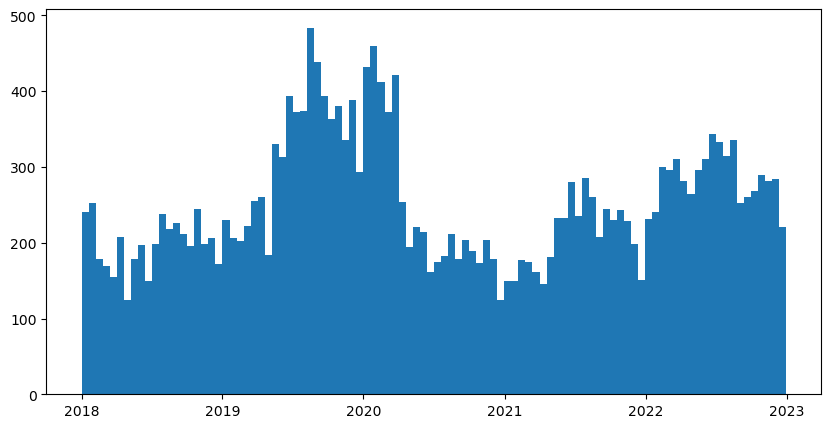

In [75]:
fig = plt.figure(figsize=(10, 5))
plt.hist(df["datetime"], bins=100)
plt.show()
